# Gradient Descent

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

## Individual Iterations of Gradient Descent

Let $f(x)=x^6 + 4*x^5 - 2*x^4 - 16*x^3 + 5*x^2 + 20*x - 12$

Calculate the derivate of f(x) by hand or using Matlab. You are allowed to 
hard-code the derivative of f(x). Plot this function and its derivative on the 
same figure, for x=-3.1 ... 1.5. 

$f'(x) = 6*x^5 + 20*x^4 - 8*x^3 - 48*x^2 + 10*x + 20$

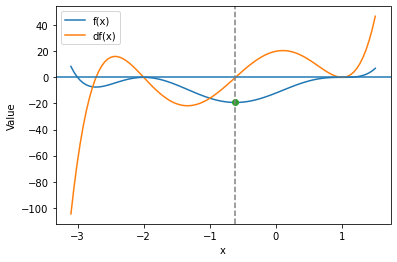

In [35]:
# Define the function and its derivative
f  = lambda x: x**6 + 4*x**5 - 2*x**4 - 16*x**3 + 5*x**2 + 20*x - 12
df = lambda x: 6*x**5 + 20*x**4 - 8*x**3 - 48*x**2 + 10*x + 20

# Plot the function and its derivative
x = np.linspace(-3.1, 1.5, 100)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f(x), label='f(x)')
ax.plot(x, df(x), label='df(x)')
ax.axhline(0)
ax.set_xlabel('x')
ax.set_ylabel('Value')
ax.legend()
ax.plot(-0.613, -19.271, 'o')
ax.axvline(-0.613, ls='--', color='gray')

Let $x_0=-1.5$ and learning rate $\eta=0.1$. Calculate and print x1, the next 
value of x, after 1 iteration of the gradient descent algorithm.

In [6]:
# Gradient descent parameters
x0 = -1.5
eta = 0.1

# First iteration
x1 = x0 - eta * df(x0)
print(f'x1 = {x1:.3f}')

x1 = 0.531


Calculate and print x2, the next value of x, after another iteration of the 
gradient descent algorithm.

In [7]:
# Second iteration
x2 = x1 - eta * df(x1)
print(f'x2 = {x2:.3f}')

x2 = -0.710


### Many iterations of Gradient Descent

Using the same function f(x) above, calculate and store $x_0,x_1,x_2,...,x_{10}$ 
into a variable called `xhistory`. You must use a for loop to code this. Do not 
write separate code for calculation of x0, calculation of x1, etc.

Display a history plot of x, (horizontal should show the iterations 1..10 and 
vertical axis should show the values that x has at each of those iterations.)

Text(0, 0.5, 'x')

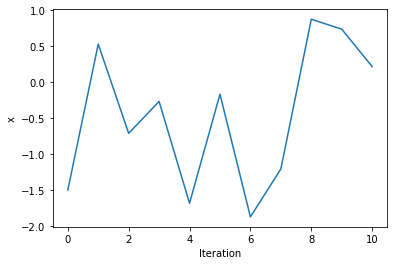

In [18]:
x0 = -1.5
eta = 0.1

# Gradient descent
xhistory = [x0]
for i in range(10):
    x = xhistory[-1] - eta * df(xhistory[-1])
    xhistory.append(x)

# Plot x over iterations
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(xhistory, '-')
ax.set_xlabel('Iteration')
ax.set_ylabel('x')

## Implement & test your own gdescent optimization function.

Write a function `[finalx, finalf] = gdescent(f,fprime,x0,eta,maxiters)` that 
finds the local minimum of a function f whose derivative is given as fprime. 
Use the input argument x0 as the initial "guess" and improve this initial guess 
using gradient descent algorithm, with learning rate eta and for maxiters 
iterations. The function should return the final improved value of x and the 
value of the function at that x. Inside the function, also plot the history of 
the x values that your algorithm improves upon, until it reaches the final guess. 
Assume that f is a function of a single scalar variable (ie. 1-dimensional). 
You may write the gdescent function in a separate file if convenient.

In [19]:
def gdescent(f, fprime, x0, eta, maxiters) -> tuple:
    """
    Gradient descent algorithm.

    Parameters
    ----------
    f : callable
        The function to minimize.
    fprime : callable
        The derivative of f.
    x0 : float
        The initial guess.
    eta : float
        The learning rate.
    maxiters : int
        The maximum number of iterations.

    Returns
    -------
    finalx : float
        The final value of x.
    finalf : float
        The final value of f(x).
    """

    # Gradient descent
    xhistory = [x0]
    for _ in range(maxiters):
        x = xhistory[-1] - eta * fprime(xhistory[-1])
        xhistory.append(x)

    return xhistory[-1], f(xhistory[-1])

### Test1

Test your gdescent implementation with the function f given above. 

- Use $x_0=-1.5,~\eta=0.1$, and `maxiters=50`. Display the finalx and finalf 
  values that gdescent() returns.
- Using $x_0=-1.5$ and `maxiters=50`, identify and use a value of eta that 
  ensures convergence to the local minima within that many iterations. 
  - You may use trial and error to identify an eta value, but only show here 
    the final eta that you came up with. Display the finalx and finalf values that gdescent() returns.

In [33]:
# First set of parameters
x0 = -1.5
eta = 0.1
maxiters = 50
finalx, finalf = gdescent(f, df, x0, eta, maxiters)
print(f'Final (x, f(x)) = ({finalx:.3f}, {finalf:.3f})')

# Second set of parameters
x0 = -1.5
eta = 0.01
maxiters = 50
finalx, finalf = gdescent(f, df, x0, eta, maxiters)
print(f'Final (x, f(x)) = ({finalx:.3f}, {finalf:.3f})')

Final (x, f(x)) = (-0.882, -17.646)
Final (x, f(x)) = (-0.613, -19.271)


### Test2

Do not change the code here.

In [37]:
f = lambda x: 2*np.sin(x) - 3*np.cos(x) + x
fprime = lambda x: 2*np.cos(x) + 3*np.sin(x) + 1
finalx, finalf = gdescent(f, fprime, 0, 0.1, 20)
print(f'Final (x, f(x)) = ({finalx:.3f}, {finalf:.3f})')

Final (x, f(x)) = (-0.869, -4.333)
